<a href="https://colab.research.google.com/github/rodrigorenemenegazzo/Python_QuantumComputing/blob/main/Algoritmo_VQE_Encontrar_o_estado_fundamental_do_Ising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Instalaçao dos pacotes

In [1]:
!pip install qiskit qiskit_aer qiskit_algorithms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 88.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.8/327.8 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.3 MB/s eta 0:00:00


In [2]:
import numpy as np
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import TwoLocal
from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import StatevectorEstimator, StatevectorSampler


##Definindo o Hamiltoniano para a figura:

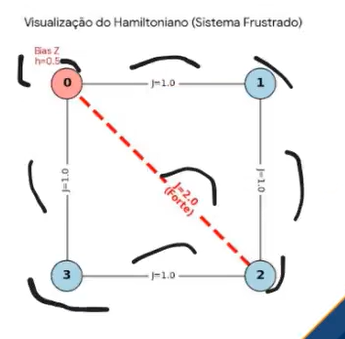

In [3]:
pauli_list = [
    ('ZZII', 1.0),  #Iteracao dos qubits 0 e 1 - TUPLA (Pauli Z e Identidade)
    ('IZZI', 1.0),  #Iteracao dos qubits 1 e 2
    ('IIZZ', 1.0),  #Iteracao dos qubits 2 e 3
    ('ZIIZ', 1.0),  #Iteracao dos qubits 3 e 0
    ('ZIZI', 2.0),  #Iteracao dos qubits 0 e 2
    ('IIIZ', 0.5),  #Bias do qubit 0
]

hamiltoniano = SparsePauliOp.from_list(pauli_list)
print(hamiltoniano)

SparsePauliOp(['ZZII', 'IZZI', 'IIZZ', 'ZIIZ', 'ZIZI', 'IIIZ'],
              coeffs=[1. +0.j, 1. +0.j, 1. +0.j, 1. +0.j, 2. +0.j, 0.5+0.j])


In [9]:
ansatz = TwoLocal(
    num_qubits=4,
    rotation_blocks='ry',
    entanglement_blocks='cz',
    entanglement='linear',
    reps=2
)
print(ansatz)
print("Possui " + str(ansatz.num_parameters) + " parametros")

     »
q_0: »
     »
q_1: »
     »
q_2: »
     »
q_3: »
     »
«     ┌──────────────────────────────────────────────────────────────────────────┐
«q_0: ┤0                                                                         ├
«     │                                                                          │
«q_1: ┤1                                                                         ├
«     │  TwoLocal(θ[0],θ[1],θ[2],θ[3],θ[4],θ[5],θ[6],θ[7],θ[8],θ[9],θ[10],θ[11]) │
«q_2: ┤2                                                                         ├
«     │                                                                          │
«q_3: ┤3                                                                         ├
«     └──────────────────────────────────────────────────────────────────────────┘
Possui 12 parametros


/tmp/ipython-input-70673808.py:1: DeprecationWarning: The class ``qiskit.circuit.library.n_local.two_local.TwoLocal`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.n_local instead.
  ansatz = TwoLocal(


In [13]:
optimizer = COBYLA(maxiter=200)
estimator = StatevectorEstimator()
vqe = VQE(estimator=estimator,
          ansatz=ansatz,
          optimizer=optimizer
)

resultado = vqe.compute_minimum_eigenvalue(
    operator=hamiltoniano)

print('Nivel de energia da solucao: AUTOVALOR', resultado.eigenvalue.real)
print('Tempo da otimizacao: ', resultado.optimizer_time)

Nivel de energia da solucao: AUTOVALOR -2.4999983549672296
Tempo da otimizacao:  1.3042645454406738


##Fazer re execucao do Ansatz e fazer a medicao apra saberquais os parametros que ele usou

In [23]:
circuito_final = ansatz.assign_parameters(resultado.optimal_parameters)
circuito_final.measure_all()
circuito_final.draw()

»
   q_0: »
        »
   q_1: »
        »
   q_2: »
        »
   q_3: »
        »
meas: 4/»
        »
«        ┌──────────────────────────────────────────────────────────────────────────────────────────────────────┐»
«   q_0: ┤0                                                                                                     ├»
«        │                                                                                                      │»
«   q_1: ┤1                                                                                                     ├»
«        │  TwoLocal(5.7523,0.023951,-3.2401,0.70538,-4.7561,-6.255,0.1552,-4.9095,2.1453,3.155,1.9972,-5.6098) │»
«   q_2: ┤2                                                                                                     ├»
«        │                                                                                                      │»
«   q_3: ┤3                                                                                                     ├»
«        └──────────────────────────────────────────────────────────────────────────────────────────────────────┘»
«meas: 4/════════════════════════════════════════════════════════════════════════════════════════════════════════»
«                                                                                                                »
«         ░ ┌─┐         
«   q_0: ─░─┤M├─────────
«         ░ └╥┘┌─┐      
«   q_1: ─░──╫─┤M├──────
«         ░  ║ └╥┘┌─┐   
«   q_2: ─░──╫──╫─┤M├───
«         ░  ║  ║ └╥┘┌─┐
«   q_3: ─░──╫──╫──╫─┤M├
«         ░  ║  ║  ║ └╥┘
«meas: 4/════╩══╩══╩══╩═
«            0  1  2  3

In [24]:
sampler = StatevectorSampler()
job = sampler.run([circuito_final])
contagens = job.result()[0].data.meas.get_counts()
print(contagens)

{'0011': 788, '0111': 236}


In [26]:
melhor_bitstring = max(contagens, key=contagens.get)
print(melhor_bitstring)

0011


#Solucao significa:

0 = +1 spin up

1 = -1 spin down


In [27]:
#Exemplo de significado
for i in (melhor_bitstring):
  if i == '0':
    print('Spin up')
  else:
    print('Spin down')


Spin up
Spin up
Spin down
Spin down
